# <a id='toc1_'></a>[Inhaltsverzeichnis](#toc0_)

<a id='toc0_'></a>    
- [Inhaltsverzeichnis](#toc1_)    
- [Show Recommendation With Machine Learning](#toc2_)    
- [1 Datencharakterisierung](#toc3_)    
  - [1.1 Netflix](#toc3_1_)    
    - [1.1.1 DataFrame-Info anschauen:](#toc3_1_1_)    
    - [1.1.2 Form der DF](#toc3_1_2_)    
    - [1.1.3 Nullwerte](#toc3_1_3_)    
    - [1.1.4 Erste Zeile der DF (DataFrame) anschauen](#toc3_1_4_)    
  - [1.2 Disney+](#toc3_2_)    
    - [1.2.1 DataFrame-Info anschauen:](#toc3_2_1_)    
    - [1.2.2 Form der DF](#toc3_2_2_)    
    - [1.2.3 Nullwerte](#toc3_2_3_)    
    - [1.2.4 Erste Zeile der DF (DataFrame) anschauen](#toc3_2_4_)    
  - [1.3 Weitere Untersuchung der Beiden DF's](#toc3_3_)    
    - [Grafik 1 - Anzhal Filme je typen Je Platform](#toc3_3_1_)    
    - [1.3.1 Rating - Alterfreigabe](#toc3_3_2_)    
    - [Grafik 2 - Anzahl der Inhalte je Altersfreigabe und je Plattform](#toc3_3_3_)    
    - [1.3.2 Länder, Genres und Regisseure](#toc3_3_4_)    
      - [a) Netflix Länder](#toc3_3_4_1_)    
      - [b) Netflix Genres](#toc3_3_4_2_)    
      - [c) Netflix Regisseure](#toc3_3_4_3_)    
      - [d) Disney+ Länder](#toc3_3_4_4_)    
      - [e) Disney+ Genres](#toc3_3_4_5_)    
      - [f) Disney+ Regisseure](#toc3_3_4_6_)    
    - [Grafik 3 - Top 10 Genres je Platform](#toc3_3_5_)    
    - [Grafik 4 - Weltkarten](#toc3_3_6_)    
    - [Tabellen](#toc3_3_7_)    
- [2 Datenaufbereitung](#toc4_)    
  - [2.1 Cleaning](#toc4_1_)    
    - [2.1.1 Für Beide](#toc4_1_1_)    
    - [2.1.2 Netflix - Länder](#toc4_1_2_)    
    - [2.1.3 Disney+ - Länder](#toc4_1_3_)    
    - [2.1.4 Netflix - 3 falsche Rating](#toc4_1_4_)    
  - [2.2 Speichern der gecleanten DF's](#toc4_2_)    
  - [2.3 Zusammenführen und Speichern](#toc4_3_)    
  - [2.4 Genres vereinfachen](#toc4_4_)    
- [3 Encoding & Features Engineering](#toc5_)    
  - [3.1 Encoding](#toc5_1_)    
    - [3.1.1 Nummerische Features vorbereiten](#toc5_1_1_)    
      - [3.1.1.1 Duration](#toc5_1_1_1_)    
      - [3.1.1.2 Altersfreigabe](#toc5_1_1_2_)    
      - [3.1.1.3 Normalisierung](#toc5_1_1_3_)    
    - [3.1.2 Multi-Label-Encoding](#toc5_1_2_)    
      - [3.1.2.1 Genres](#toc5_1_2_1_)    
      - [3.1.2.2 Plattformen](#toc5_1_2_2_)    
    - [3.1.3 TF-IDF Vektorisierung](#toc5_1_3_)    
  - [3.2  Hybrid-Ansatz zur Anlass-Kategorisierung für Filme](#toc5_2_)    
    - [3.2.1 Regelbasierte Anlass-Zuweisung](#toc5_2_1_)    
    - [3.2.2 Keyword-Matching mit TF-IDF](#toc5_2_2_)    
    - [3.2.3 Supervisod Module für unklare Fälle](#toc5_2_3_)    
    - [Grafik 5 - Heatmap Anlässe pro Filme](#toc5_2_4_)    
- [4 Modelling](#toc6_)    
  - [](#toc6_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Show Recommendation With Machine Learning](#toc0_)

In [64]:
import pandas as pd
import numpy as np
import os
import plotly as pl
import seaborn as sns
import pycountry
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from tabulate import tabulate
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import scipy.sparse as sp

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
dataset_dir = os.path.join(notebook_dir, '../1_Datenset/ursprüngliche')

disney_df = pd.read_csv(os.path.join(dataset_dir, 'disney_plus_titles.csv'), sep=',')
netflix_df = pd.read_csv(os.path.join(dataset_dir, 'netflix_titles.csv'), sep=',')

df_list = [
    ('disney_df', disney_df),
    ('netflix_df', netflix_df)
]

# <a id='toc3_'></a>[1 Datencharakterisierung](#toc0_)

Als erstes werden notwendige <span style="color:seagreen">packages</span> installiert und <span style="color:coral">csv</span> Dateien von Netflix und Disney+ eingelesen und in <span style="color:lightblue">df_list</span> gespeichert für eine schnellere Untersuchung und weniger Codezeilen.

## <a id='toc3_1_'></a>[1.1 Netflix](#toc0_)

### <a id='toc3_1_1_'></a>[1.1.1 DataFrame-Info anschauen:](#toc0_)
- Anzahl der Einträge, -> 8807 Zeilen 
- Spaltennamen, -> 12 Spalten
- Nicht-Null-Werte, -> Nullwerte vorhanden in ein paar Spalten
- Datentypen -> fast überall object, manche bräuchten wir als integer

In [65]:
print('--------------------------------------------------------------------')
print('Info:')
print(netflix_df.info()) 
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
--------------------------------------------------------------------


### <a id='toc3_1_2_'></a>[1.1.2 Form der DF](#toc0_)

-> Anzahl Zeilen und Spalten

In [66]:
print('--------------------------------------------------------------------')
print('Shape:')
print(netflix_df.shape)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Shape:
(8807, 12)
--------------------------------------------------------------------


### <a id='toc3_1_3_'></a>[1.1.3 Nullwerte](#toc0_)

Schon vorhin bei info gesehen, aber nochmal deutlicher anschauen.

- Nullwerte bei Regisseur, Scahuspieler und Länder kann man später mit 'unknow' füllen.
- ist date_added nötig?
    - nicht wirklich
- rating und duration später als Nummer vllt mit Median füllen? 
    - bei duration sinnvol 
    - bei rating nicht -> stattdessen als Unrated gekennzeichen

In [67]:
print('--------------------------------------------------------------------')
print('Nullwerte pro Spalte: ')
print(netflix_df.isna().sum())
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Nullwerte pro Spalte: 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
--------------------------------------------------------------------


### <a id='toc3_1_4_'></a>[1.1.4 Erste Zeile der DF (DataFrame) anschauen](#toc0_)

Beobachtungen:
- show_id mit 's' + x
- type: 2 Werte -> Movie oder TV Show
- Titel, Regisseur, Cast, Beschreibung: sehr unterschiedliche, manche Werte fehlen.
- Genres und Länder: mehrere Hintereinander angereiht
- Duration: bei Filmen als Minute, bei Serien als Stafel

In [68]:
print('--------------------------------------------------------------------')
print('Head:')
print(netflix_df.head())
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Head:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  Septembe

## <a id='toc3_2_'></a>[1.2 Disney+](#toc0_)

### <a id='toc3_2_1_'></a>[1.2.1 DataFrame-Info anschauen:](#toc0_)
- Anzahl der Einträge, -> 1450 Zeilen 
- Spaltennamen, -> 12 Spalten
- Nicht-Null-Werte, -> Nullwerte vorhanden in ein paar Spalten
- Datentypen -> fast überall object, manche bräuchten wir als integer

-> Außer die Zeilenanzahl genau gleich aufgebaut wie der Netflix Datensatz.

In [69]:
print('--------------------------------------------------------------------')
print('Info:')
print(disney_df.info())
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB
None
--------------------------------------------------------------------


### <a id='toc3_2_2_'></a>[1.2.2 Form der DF](#toc0_)

-> Anzahl Zeilen und Spalten

In [70]:
print('--------------------------------------------------------------------')
print('Shape:')
print(disney_df.shape)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Shape:
(1450, 12)
--------------------------------------------------------------------


### <a id='toc3_2_3_'></a>[1.2.3 Nullwerte](#toc0_)

Schon vorhin bei info gesehen, aber nochmal deutlicher anschauen.

- Nullwerte bei Regisseur, Scahuspieler und Länder kann man später mit 'unknow' füllen.
- ist date_added nötig?
    - nicht wirklich
- Nullwerte in rating später als unrated 

In [71]:
print('--------------------------------------------------------------------')
print('Nullwerte pro Spalte: ')
print(disney_df.isna().sum())
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Nullwerte pro Spalte: 
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64
--------------------------------------------------------------------


### <a id='toc3_2_4_'></a>[1.2.4 Erste Zeile der DF (DataFrame) anschauen](#toc0_)

Beobachtungen:
- show_id mit 's' + x
- type: 2 Werte -> Movie oder TV Show
- Titel, Regisseur, Cast, Beschreibung: sehr unterschiedliche, manche Werte fehlen.
- Genres und Länder: mehrere Hintereinander angereiht
- Duration: bei Filmen als Minute, bei Serien als Stafel

-> alles genauso wie bei Netflix Datensatz

In [72]:
print('--------------------------------------------------------------------')
print('Head:')
print(disney_df.head())
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Head:
  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguiza

## <a id='toc3_3_'></a>[1.3 Weitere Untersuchung der Beiden DF's](#toc0_)

Beobachtungen:
- Anzahl Duplikate wird anhand des Titels untersucht. Da es 0 ist muss man keine Duplikate entfernen.
- Anteil Filme und Serien ist ca gleich auf dne beiden Platformen.
- Alterfreigabe wird gleich näher untersucht.
- Regisseure, Genres und Länder untersuchen !!!

In [73]:
for name, df in df_list:
    print(name)
    print('Anzahl der Duplikate:', df[df.duplicated(subset=['title'])].shape[0])
    print('Typen:', df['type'].value_counts())
    print('Anzahl Alterfreigaben:', df['rating'].nunique())
    print('Anzahl Regisseure:', df['director'].nunique())
    print('Anzahl Genres:', df['listed_in'].nunique()) # sehr hohe Zahl -> Werte anschauen
    print('Anzahl Länder:', df['country'].nunique()) # bei Netflix 740 -> Werte anschauen
    print('--------------------------------------------------------------------')


disney_df
Anzahl der Duplikate: 0
Typen: type
Movie      1052
TV Show     398
Name: count, dtype: int64
Anzahl Alterfreigaben: 9
Anzahl Regisseure: 609
Anzahl Genres: 329
Anzahl Länder: 89
--------------------------------------------------------------------
netflix_df
Anzahl der Duplikate: 0
Typen: type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Anzahl Alterfreigaben: 17
Anzahl Regisseure: 4528
Anzahl Genres: 514
Anzahl Länder: 748
--------------------------------------------------------------------


### <a id='toc3_3_1_'></a>[Grafik 1 - Anzhal Filme je typen Je Platform](#toc0_)

In [74]:
Typ_Disney = disney_df['type'].value_counts()
Typ_Netflix = netflix_df['type'].value_counts()

netflix_kleiner_teil_index = Typ_Netflix.idxmin()
netflix_kleiner_teil_wert = Typ_Netflix.min()
netflix_großer_teil_wert = Typ_Netflix.sum() - netflix_kleiner_teil_wert

# Disney+ (rechts)
disney_kleiner_teil_index = Typ_Disney.idxmin()
disney_kleiner_teil_wert = Typ_Disney.min()
disney_großer_teil_wert = Typ_Disney.sum() - disney_kleiner_teil_wert

fig = make_subplots(rows=1, cols=1, specs=[[{'type':'xy'}]])

# Netflix und Disney+ in einem Diagramm
fig.add_trace(go.Bar(name='Netflix', x=Typ_Netflix.index, y=[netflix_großer_teil_wert, netflix_kleiner_teil_wert],
                     marker=dict(color=['#7D2020', '#7D2020']),
                     text=[netflix_großer_teil_wert, netflix_kleiner_teil_wert], textposition='auto',
                     textfont=dict(family="Arial", size=14, color="white")))

fig.add_trace(go.Bar(name='Disney+', x=Typ_Disney.index, y=[disney_großer_teil_wert, disney_kleiner_teil_wert],
                     marker=dict(color=['#7EAAD3', '#7EAAD3']),
                     text=[disney_großer_teil_wert, disney_kleiner_teil_wert], textposition='auto',
                     textfont=dict(family="Arial", size=14, color="black")))

fig.update_layout(title='<i><b>Content type provided by Netflix and Disney+</b></i>', 
                   title_font=dict(family='cursive', size=20, color='black'),
                   title_x=0.5,
                   paper_bgcolor='#D8EDF9',
                   plot_bgcolor='#D8EDF9',
                   legend=dict(
                       x=1,
                       y=1,
                       traceorder="normal",
                       font=dict(
                           family="Droid Serif",
                           size=15,
                           color="black"),
                       bgcolor="#D8EDF9",
                       title='Platform'
                   ))

fig.show()

### <a id='toc3_3_2_'></a>[1.3.1 Rating - Alterfreigabe](#toc0_)

1. Welche Ratings gibt es je Platform?
2. Anzahl der jeweilige Shows je Platform, je Typ und je Alterfreigabe.
3. Grafik

In [75]:
print('1.')
print('--------------------------------------------------------------------')

# Einzigartige Ratings für Disney+ anzeigen
print('Einzigartige Ratings für Disney+:')
disney_ratings = set(disney_df['rating'].unique())
print(disney_ratings)
print('--------------------------------------------------------------------')

# Einzigartige Ratings für Netflix anzeigen
print('Einzigartige Ratings für Netflix:')
netflix_ratings = set(netflix_df['rating'].unique())
print(netflix_ratings)
print('--------------------------------------------------------------------')

# Gemeinsame Ratings anzeigen
print('Gemeinsame Ratings:')
common_ratings = disney_ratings.intersection(netflix_ratings)
print(common_ratings)
print('--------------------------------------------------------------------')

# Unterschiedliche Ratings anzeigen
print('Unterschiedliche Ratings:')
unique_ratings = disney_ratings.symmetric_difference(netflix_ratings)
print(unique_ratings)
print('--------------------------------------------------------------------')

1.
--------------------------------------------------------------------
Einzigartige Ratings für Disney+:
{'TV-Y', 'G', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'PG', 'TV-Y7-FV', nan, 'PG-13'}
--------------------------------------------------------------------
Einzigartige Ratings für Netflix:
{'84 min', 'TV-Y', 'TV-Y7', 'G', 'TV-G', 'TV-PG', '66 min', 'UR', 'TV-14', 'PG', 'NR', 'TV-Y7-FV', 'R', nan, 'NC-17', '74 min', 'PG-13', 'TV-MA'}
--------------------------------------------------------------------
Gemeinsame Ratings:
{'TV-Y', 'G', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'PG', 'TV-Y7-FV', nan, 'PG-13'}
--------------------------------------------------------------------
Unterschiedliche Ratings:
{'84 min', '66 min', 'UR', 'NR', '74 min', 'TV-MA', 'NC-17', 'R'}
--------------------------------------------------------------------


- '66 min', '74 min', '84 min',
die hier dürften nicht in der Spalte 'rating' sein

In [76]:
# Zeilen finden, die die Werte '66 min', '74 min' oder '84 min' in der Spalte 'rating' enthalten
values_to_find = ['66 min', '74 min', '84 min']
for value in values_to_find:
    rows = netflix_df[netflix_df['rating'] == value].index.tolist()
    if rows:
        print(f"'{value}' befindet sich in den Zeilen {rows} in der Spalte 'rating'")

'66 min' befindet sich in den Zeilen [5813] in der Spalte 'rating'
'74 min' befindet sich in den Zeilen [5541] in der Spalte 'rating'
'84 min' befindet sich in den Zeilen [5794] in der Spalte 'rating'


Die 3 falsch Einträge sind in der falschen Spalte. Diese müssen später in die Duration Spalte umgeschreiben werden beim Cleanen.

In [77]:
print('2.')
print('--------------------------------------------------------------------')

# Ratings und deren Anzahlen für Disney+
disney_ratings = disney_df.groupby(['rating', 'type']).size().reset_index(name='count')
disney_ratings['source'] = disney_ratings['type'].apply(lambda x: 'Disney+ Movie' if x == 'Movie' else 'Disney+ Serie')
disney_ratings = disney_ratings.drop(columns=['type'])

# Ratings und deren Anzahlen für Netflix
netflix_ratings = netflix_df.groupby(['rating', 'type']).size().reset_index(name='count')
netflix_ratings['source'] = netflix_ratings['type'].apply(lambda x: 'Netflix Movie' if x == 'Movie' else 'Netflix Serie')
netflix_ratings = netflix_ratings.drop(columns=['type'])

# Zusammenführen der beiden DataFrames
all_ratings = pd.concat([disney_ratings, netflix_ratings])

# Ausgabe der Ratings mit den jeweiligen Anzahlen
print(all_ratings)
print('--------------------------------------------------------------------')


2.
--------------------------------------------------------------------
      rating  count         source
0          G    253  Disney+ Movie
1         PG    235  Disney+ Movie
2         PG      1  Disney+ Serie
3      PG-13     66  Disney+ Movie
4      TV-14     37  Disney+ Movie
5      TV-14     42  Disney+ Serie
6       TV-G    233  Disney+ Movie
7       TV-G     85  Disney+ Serie
8      TV-PG    181  Disney+ Movie
9      TV-PG    120  Disney+ Serie
10      TV-Y      3  Disney+ Movie
11      TV-Y     47  Disney+ Serie
12     TV-Y7     36  Disney+ Movie
13     TV-Y7     95  Disney+ Serie
14  TV-Y7-FV      7  Disney+ Movie
15  TV-Y7-FV      6  Disney+ Serie
0     66 min      1  Netflix Movie
1     74 min      1  Netflix Movie
2     84 min      1  Netflix Movie
3          G     41  Netflix Movie
4      NC-17      3  Netflix Movie
5         NR     75  Netflix Movie
6         NR      5  Netflix Serie
7         PG    287  Netflix Movie
8      PG-13    490  Netflix Movie
9          R    79

### <a id='toc3_3_3_'></a>[Grafik 2 - Anzahl der Inhalte je Altersfreigabe und je Plattform](#toc0_)

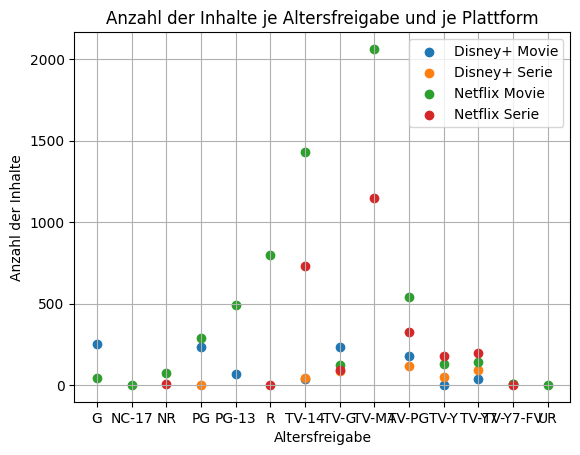

In [78]:
# Werte, die ausgeschlossen werden sollen
values_to_exclude = ['66 min', '74 min', '84 min']

# Gruppieren der Daten nach rating und source
grouped_ratings = all_ratings.groupby(['rating', 'source']).sum().unstack()

# Werte filtern
filtered_ratings = grouped_ratings[~grouped_ratings.index.isin(values_to_exclude)]

# Plot erstellen
fig, ax = plt.subplots()

# Scatterplot für jede Quelle erstellen
for source in filtered_ratings.columns.levels[1]:
    ax.scatter(filtered_ratings.index, filtered_ratings['count'][source], label=source)

# Diagramm anpassen
plt.title('Anzahl der Inhalte je Altersfreigabe und je Plattform')
plt.xlabel('Altersfreigabe')
plt.ylabel('Anzahl der Inhalte')
plt.grid(True)
plt.legend(title='')

# Diagramm anzeigen
plt.show()

### <a id='toc3_3_4_'></a>[1.3.2 Länder, Genres und Regisseure](#toc0_)

1. Wieso gibt es so viele?
    - 748 Stück bei Netflix -> unmöglich
2. Sind all die Einträge für Länder plausibel?

Beobachtung: 
- 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'

-> Das hier wird als ein Land gewertet, welcher falsch ist. 

#### <a id='toc3_3_4_1_'></a>[a) Netflix Länder](#toc0_)

In [79]:
print('1.')
print('--------------------------------------------------------------------')
netflix_df['country'].unique()

1.
--------------------------------------------------------------------


array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [80]:
print('2.')
print('--------------------------------------------------------------------')

def is_valid_country(country_name):
    if pd.isna(country_name) or country_name.lower() in ['unknown'] + ['russia']:
        return True
    try:
        pycountry.countries.lookup(country_name)
        return True
    except LookupError:
        return False

def is_valid_country(country_name):
    valid_countries = ['turkey', 'russia', 'palestine', 'vatican city', 'soviet union']
    if pd.isna(country_name) or country_name.lower() in ['unknown'] + valid_countries:
        return True
    if country_name.lower() == 'soviet union':
        country_name = 'russia'
    if country_name.lower() in ['west germany', 'east germany']:
        country_name = 'germany'
    try:
        pycountry.countries.lookup(country_name)
        return True
    except LookupError:
        return False


invalid_countries = netflix_df['country'].apply(lambda x: [country.strip() for country in str(x).split(',') if country.strip() != 'unknown' and not is_valid_country(country.strip())])
print('Nicht plasible Länder')

print(invalid_countries[invalid_countries.apply(len) > 0])


2.
--------------------------------------------------------------------
Nicht plasible Länder
2       [nan]
3       [nan]
5       [nan]
6       [nan]
10      [nan]
        ...  
8718    [nan]
8759    [nan]
8783    [nan]
8785    [nan]
8803    [nan]
Name: country, Length: 838, dtype: object


-> Wird später gecleant und anschließend wieder untersucht

#### <a id='toc3_3_4_2_'></a>[b) Netflix Genres](#toc0_)

Beobachtung:
- Es gibt zu viele Genres.
- Es gibt aber keine falschen Einträge.

In [81]:
netflix_df_copy_1 = netflix_df.copy()
netflix_df_copy_1['listed_in'] = netflix_df_copy_1['listed_in'].str.split(',')
netflix_df_copy_1['listed_in'] = netflix_df_copy_1['listed_in'].apply(lambda x: [genre.strip() for genre in x])
netflix_df_genres = netflix_df_copy_1.explode('listed_in')
unique_genres_netflix = netflix_df_genres['listed_in'].unique()
print(unique_genres_netflix)

['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'
 'Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Comedies' 'Spanish-Language TV Shows' 'Thrillers' 'Romantic Movies'
 'Music & Musicals' 'Horror Movies' 'Sci-Fi & Fantasy' 'TV Thrillers'
 "Kids' TV" 'Action & Adventure' 'TV Sci-Fi & Fantasy' 'Classic Movies'
 'Anime Features' 'Sports Movies' 'Anime Series' 'Korean TV Shows'
 'Science & Nature TV' 'Teen TV Shows' 'Cult Movies' 'TV Shows'
 'Faith & Spirituality' 'LGBTQ Movies' 'Stand-Up Comedy' 'Movies'
 'Stand-Up Comedy & Talk Shows' 'Classic & Cult TV']


In [82]:
netflix_movies_per_genres = netflix_df_genres['listed_in'].value_counts()
print(netflix_movies_per_genres)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

#### <a id='toc3_3_4_3_'></a>[c) Netflix Regisseure](#toc0_)

Beobachtiung:
- Es gibt keine falschen Einträge.

In [83]:
netflix_df_copy_2 = netflix_df.copy()
netflix_df_copy_2['director'] = netflix_df_copy_2['director'].str.split(',')
netflix_df_copy_2['director'] = netflix_df_copy_2['director'].apply(lambda x: [director.strip() for director in x] if isinstance(x, list) else x)
netflix_df_directors = netflix_df_copy_2.explode('director')
unique_directors_netflix = netflix_df_directors['director'].unique()
print(unique_directors_netflix)

['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']



#### <a id='toc3_3_4_4_'></a>[d) Disney+ Länder](#toc0_)


In [84]:
disney_df['country'].unique()

array([nan, 'United States', 'United States, Canada',
       'United States, Australia', 'Canada',
       'United States, United Kingdom', 'United States, South Korea',
       'Ireland, United States, Canada, United Kingdom, Denmark, Spain, Poland, Hungary',
       'France, United Kingdom', 'United Kingdom, Australia',
       'Ireland, United States', 'Canada, United States, France',
       'France, South Korea, Japan, United States', 'France',
       'United States, United Kingdom, Hungary', 'United States, Germany',
       'United States, United Kingdom, Australia', 'United States, India',
       'United States, Canada, United Kingdom, Singapore, Australia, Thailand',
       'Canada, United States',
       'South Korea, United States, China, Japan',
       'Australia, United Kingdom', 'United Kingdom',
       'United States, United Kingdom, South Korea',
       'United States, United Kingdom, Canada',
       'United States, Germany, United Kingdom',
       'United States, Canada, Ire

is_valid_country() - Methode bei Netflix erstellt

In [85]:
d_invalid_countries = disney_df['country'].apply(lambda x: [country.strip() for country in str(x).split(',') if country.strip() != 'unknown' and not is_valid_country(country.strip())])

print('Nicht plasible Länder')
if len(d_invalid_countries[d_invalid_countries.apply(len) > 0]) == 0:
    print('Alle Länder sind plausibel')
else:
    print(d_invalid_countries[d_invalid_countries.apply(len) > 0])


Nicht plasible Länder
0       [nan]
1       [nan]
3       [nan]
4       [nan]
6       [nan]
        ...  
1136    [nan]
1204    [nan]
1210    [nan]
1259    [nan]
1388    [nan]
Name: country, Length: 219, dtype: object


-> Wird später gecleant und anschließend wieder untersucht

#### <a id='toc3_3_4_5_'></a>[e) Disney+ Genres](#toc0_)

Beobachtung:
- Viele Genres die nur einen einzigen Film haben.
- Es gibt zu viele Genres.
- Es gibt keine falsche Einträge.

In [86]:
disney_df_copy_1 = disney_df.copy()
disney_df_copy_1['listed_in'] = disney_df_copy_1['listed_in'].str.split(',')
disney_df_copy_1['listed_in'] = disney_df_copy_1['listed_in'].apply(lambda x: [genre.strip() for genre in x])
disney_df_genres = disney_df_copy_1.explode('listed_in')
disney_df_genres['listed_in'] = disney_df_genres['listed_in'].str.strip()
unique_genres = disney_df_genres['listed_in'].unique()
print(unique_genres)

['Animation' 'Family' 'Comedy' 'Musical' 'Docuseries' 'Historical' 'Music'
 'Biographical' 'Documentary' 'Action-Adventure' 'Superhero' 'Reality'
 'Survival' 'Animals & Nature' 'Kids' 'Coming of Age' 'Drama' 'Fantasy'
 'Lifestyle' 'Movies' 'Science Fiction' 'Concert Film' 'Crime' 'Sports'
 'Anthology' 'Medical' 'Variety' 'Spy/Espionage' 'Buddy' 'Parody'
 'Game Show / Competition' 'Romance' 'Anime' 'Romantic Comedy' 'Thriller'
 'Police/Cop' 'Talk Show' 'Western' 'Dance' 'Series' 'Mystery'
 'Soap Opera / Melodrama' 'Disaster' 'Travel']


In [87]:
disney_movies_per_genres = disney_df_genres['listed_in'].value_counts()
print(disney_movies_per_genres) 

listed_in
Family                     632
Animation                  542
Comedy                     526
Action-Adventure           452
Animals & Nature           208
Coming of Age              205
Fantasy                    192
Documentary                174
Kids                       141
Drama                      134
Docuseries                 122
Science Fiction             91
Historical                  53
Music                       48
Musical                     44
Sports                      43
Biographical                41
Buddy                       40
Anthology                   28
Reality                     26
Romance                     20
Superhero                   19
Crime                       16
Variety                     12
Mystery                     12
Game Show / Competition     10
Survival                     9
Parody                       9
Lifestyle                    8
Western                      7
Concert Film                 7
Medical                      

#### <a id='toc3_3_4_6_'></a>[f) Disney+ Regisseure](#toc0_)

Beobachtung:
- Es gibt keine falsche Einträge.

In [88]:
disney_df_copy_2 = disney_df.copy()
disney_df_copy_2['director'] = disney_df_copy_2['director'].str.split(',')
disney_df_copy_2['director'] = disney_df_copy_2['director'].apply(lambda x: [director.strip() for director in x] if isinstance(x, list) else x)
disney_df_directors = disney_df_copy_2.explode('director')

unique_directors = disney_df_directors['director'].unique()
print(unique_directors)

['Alonso Ramirez Ramos' 'Dave Wasson' 'John Cherry' 'Karen Disher'
 'Hamish Hamilton' nan 'Liz Garbus' 'Kirk R. Thatcher' 'John Gleim'
 'Leslie Iwerks' 'McKenna Harris' 'Kevin Lima' 'Patrick Osborne'
 'Chris Buck' 'Jennifer Lee' 'Lauren MacMullan' 'Dan Mazer'
 'Jaume Collet-Serra' 'John Kahrs' 'Destin Daniel Cretton'
 'Manjari Makijany' 'Nathan Greno' 'Byron Howard' 'Stevie Wermers-Skelton'
 'Kevin Deters' 'Roger Allers' 'David Clair' 'David Silverman'
 'Dean Wellins' 'Mike Mitchell' 'Brian Levant' 'Alex Zamm' 'Robert Vince'
 'Matthew Vaughn' 'Niki Caro' 'Daniel Stern' 'Don Bluth' 'Gary Goldman'
 'Jim Greayer' 'Ben Crichton' 'Jeff Gordon' 'Kirk Thatcher' 'Dave Hoffman'
 'Cate Shortland' 'John Hoffman' 'Janet Tobias' 'Tim Hill' 'Walt Becker'
 'Ken Cunningham' 'Robert Stromberg' 'Eddie Trigueros' 'Jason Sterman'
 'Leanne Dare' 'Josh Boone' 'P.J. Hogan' 'Salvador Simó' 'Jay Hatcher'
 'Katie Bauer Murdock' 'Louis Gonzales' 'Rob Marshall' 'Aphton Corbin'
 'Robert Rodriguez' 'Simon Kinberg' 

### <a id='toc3_3_5_'></a>[Grafik 3 - Top 10 Genres je Platform](#toc0_)

In [89]:
# Disney Genres
disney_genres = disney_df['listed_in'].str.split(', ', expand=True).stack()
disney_genre_counts = disney_genres.value_counts().head(10)  # Filter the top 10 genres
disney_colorscale=[[0, '#BFF5FD'], [1, '#142864']]

# Netflix Genres
netflix_genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()
netflix_genre_counts = netflix_genres.value_counts().head(10)  # Filter the top 10 genres
netflix_colorscale=[[0, '#E50914'], [1, '#141414']]

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Disney+ Genres', 'Top 10 Netflix Genres'))

# Add Disney+ data to subplot 1
fig.add_trace(go.Bar(x=disney_genre_counts.index, y=disney_genre_counts.values,
                     marker=dict(color=disney_genre_counts.values, colorscale=disney_colorscale),
                     showlegend=False),
              row=1, col=1)

# Add Netflix data to subplot 2
fig.add_trace(go.Bar(x=netflix_genre_counts.index, y=netflix_genre_counts.values,
                     marker=dict(color=netflix_genre_counts.values, colorscale=netflix_colorscale),
                     showlegend=False),
              row=1, col=2)

# Update layout
fig.update_layout(title='<i><b>Top 10 Genre Contributions for Disney+ and Netflix</b></i>',
                  title_x=0.5,
                  font=dict(family='cursive', size=20, color='white'),
                  plot_bgcolor='rgba(0, 0, 0, 1)',  # Black background for Netflix
                  paper_bgcolor='rgba(0, 0, 0, 1)',  # Black background for Netflix
                  annotations=[dict(x=0.22, y=0.95, xref='paper', yref='paper',  # Disney+ annotation position
                                    text='<b>Disney+</b>', showarrow=False,
                                    font=dict(family='cursive', size=25, color='#BFF5FD')),
                               dict(x=0.78, y=0.95, xref='paper', yref='paper',  # Netflix annotation position
                                    text='<b>Netflix</b>', showarrow=False,
                                    font=dict(family='Open Sans', size=25, color='#E50914'))])

fig.update_xaxes(tickangle=45, tickfont=dict(size=12, family='Droid Serif', color='white'))
fig.update_yaxes(tickfont=dict(size=15, family='Droid Serif', color='white'))

fig.show()


### <a id='toc3_3_6_'></a>[Grafik 4 - Weltkarten](#toc0_)

- hier für werden schon das gecleante Datensatz verwendet, da mit den Ursprünglichen Probleme aufgetreten sind aufgrund der Kommas.
- In Browser öffnen, da ist es eine bessere Sicht.
    http://127.0.0.1:8050

In [90]:

# Daten für die Weltkarte vorbereiten
netflix = pd.read_csv('../1_Datenset/erstellte/cleaned/netflix_titles_cleaned.csv')
disney = pd.read_csv('../1_Datenset/erstellte/cleaned/disney_plus_titles_cleaned.csv')


countries_netflix = netflix['country'].str.split(', ', expand=True).stack()
countries_counts_netflix = countries_netflix.value_counts()

if 'unknown' in countries_counts_netflix.index:
    countries_counts_netflix = countries_counts_netflix.drop('unknown')

colorscale_netflix = [
    [0, '#FFE4C4'],  
    [0.025, '#FF0000'],  
    [0.2, '#8B0000'],    
    [1, '#000000'], 
]

countries_disney = disney['country'].str.split(', ', expand=True).stack()
countries_counts_disney = countries_disney.value_counts()

if 'unknown' in countries_counts_disney.index:
    countries_counts_disney = countries_counts_disney.drop('unknown')

colorscale_disney = [
    [0, '#BFF5FD'],    
    [0.7, '#113CCF'],
    [1, '#142864']
]

# Weltkarte erstellen und Länder darstellen für Netflix
fig_netflix = go.Figure((go.Choropleth(
    locationmode='country names',
    locations=countries_counts_netflix.index,  
    z=countries_counts_netflix.values,  
    zmin=0,
    zmax=3500,
    colorscale=colorscale_netflix,
    autocolorscale=False,
    marker_line_color='darkgrey',  
    marker_line_width=1, 
    text=countries_counts_netflix.index,  
    hoverinfo='location+z',  
)))
fig_netflix.update_layout(
    title='Netflix Content by Country',
    font=dict(family='Open Sans', color='#E50914', size=15),
    title_x=0.5,
    geo=dict(
        showframe=True,  
        showcoastlines=False,  
        projection_type='natural earth', 
        showland=True,  
        landcolor='rgb(217, 217, 217)',  
    ),
)

# Weltkarte erstellen und Länder darstellen für Disney+
fig_disney = go.Figure((go.Choropleth(
    locationmode='country names',
    locations=countries_counts_disney.index,  
    z=countries_counts_disney.values,  
    zmin=0,
    zmax=1500,
    colorscale=colorscale_disney,
    autocolorscale=False,
    marker_line_color='darkgrey',  
    marker_line_width=1, 
    text=countries_counts_disney.index,  
    hoverinfo='location+z',  
)))
fig_disney.update_layout(
    title='Disney+ Content by Country',
    font=dict(family='cursive', color='#113CCF', size=15),
    title_x=0.5,
    geo=dict(
        showframe=True,  
        showcoastlines=False,  
        projection_type='natural earth', 
        showland=True,  
        landcolor='white',  
        showocean=True,
        oceancolor='darkgrey',
    ),
)

# Dropdown-Menü-Optionen für alle Länder
all_countries = list(set(countries_counts_netflix.index) | set(countries_counts_disney.index))
all_countries.sort()  # Sortiere die Liste alphabetisch
all_countries.insert(0, 'All')  # Füge "All" am Anfang der Liste ein
dropdown_options = [{'label': country, 'value': country} for country in all_countries]

# Dash-App erstellen
app = dash.Dash(__name__)

# Layout definieren
app.layout = html.Div([
    html.H1('Content by Country', style={'text-align': 'center', 'font-style': 'italic', 'font-family':'Droid Serif','font-weight': 'bold', 'font-size': '40px'}),
    html.Div([
        dcc.Dropdown(
            id='country-dropdown',
            options=dropdown_options,
            value=None,
            style={'width': '250px'}),  # Breite der Dropdown-Liste anpassen
        html.Label('Once you select a country, that country will be color-highlighted on the maps. You will see how many content were produced in that country. Other countries will also be color-highlighted to show how many content were co-produced with the selected country. For example, 803 content were produced in the United Kingdom, of which 278 content were co-produced with the United States. You can see this information by hovering over the United States on the map. If the colorscale disappears, it means that there are no content in the dataset that were filmed in that country for that platform.',
                   style={'font-weight': 'bold', 'font-family': 'Droid Serif', 'font-style':'italic', 'display': 'block', 'margin-top': '10px'})
    ], style={'display': 'flex', 'align-items': 'center', 'flex-direction': 'column'}),
    
    html.Div([
        html.Div([
            dcc.Graph(id='choropleth-map-netflix', figure=fig_netflix),
        ], className='six columns', style={'display': 'inline-block', 'width': '46%', 'height': '80vh'}),
        html.Div([
            dcc.Graph(id='choropleth-map-disney', figure=fig_disney),
        ], className='six columns', style={'display': 'inline-block', 'width': '47%', 'height': '80vh'}),
    ], className='row', style={'width': '100%',  'center': 'center'}),
])


# Callback-Funktionen für Dropdown-Menü
@app.callback(
    Output('choropleth-map-netflix', 'figure'),
    Output('choropleth-map-disney', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_dropdown(selected_country):
    fig_netflix_updated = fig_netflix
    fig_disney_updated = fig_disney

    if selected_country:
        if selected_country == 'All' or selected_country is None:
            return fig_netflix, fig_disney

        if selected_country in countries_counts_netflix.index:
            # Filtern der Daten für Netflix
            filtered_countries_counts_netflix = countries_counts_netflix[countries_counts_netflix.index == selected_country]

            fig_netflix_updated = go.Figure((go.Choropleth(
                locationmode='country names',
                locations=filtered_countries_counts_netflix.index,  
                z=filtered_countries_counts_netflix.values,  
                zmin=0,
                zmax=3500,
                colorscale=colorscale_netflix,
                autocolorscale=False,
                marker_line_color='darkgrey',  
                marker_line_width=1, 
                text=filtered_countries_counts_netflix.index,  
                hoverinfo='location+z',  
            )))

            # Markiere alle Länder, die mit dem ausgewählten Land verbunden sind, auf der Karte als Scatter Plot
            associated_countries_netflix = netflix[netflix['country'].str.contains(selected_country, na=False)]['country'].str.split(', ')
            associated_countries_counts_netflix = associated_countries_netflix.explode().value_counts()

            # Markiere das ausgewählte Land und die verbundenen Länder auf der Karte
            locations = [selected_country] + associated_countries_counts_netflix.index.tolist()
            counts = [filtered_countries_counts_netflix[selected_country]] + associated_countries_counts_netflix.tolist()

            fig_netflix_updated.add_trace(go.Choropleth(
                locationmode='country names',
                locations=locations,
                z=counts,
                zmin=0,
                zmax=3500,
                colorscale=colorscale_netflix,
                autocolorscale=False,
                marker_line_color='darkgrey',
                marker_line_width=1,
                text=[f"Total count of content in {selected_country}: {counts[0]}<br>{z} contant was co-produced with {location}" for location, count, z in zip(locations, counts, counts)],
                hoverinfo='text'
            ))

            fig_netflix_updated.update_layout(
                title=f'Netflix Content in {selected_country} & associated countries',
                font=dict(family='Open Sans', color='#E50914', size=15),
                title_x=0.5,
                geo=dict(
                    showframe=True,  
                    showcoastlines=False,  
                    projection_type='natural earth', 
                    showland=True,  
                    landcolor='rgb(217, 217, 217)',  
                ),
            )
        else:
            # Filtern der Daten für Netflix
            filtered_countries_counts_netflix = countries_counts_netflix[countries_counts_netflix.index == selected_country]

            fig_netflix_updated = go.Figure((go.Choropleth(
                locationmode='country names',
                locations=filtered_countries_counts_netflix.index,  
                z=filtered_countries_counts_netflix.values,  
                zmin=0,
                zmax=3500,
                colorscale=colorscale_netflix,
                autocolorscale=False,
                marker_line_color='darkgrey',  
                marker_line_width=1, 
                text=[f"Total count of content in {selected_country}: {counts[0]}<br>{z} contant was co-produced with {location}" for location, count, z in zip(locations, counts, counts)],
                hoverinfo='text'  
            )))
            fig_netflix_updated.update_layout(
                title=f'Netflix Content in {selected_country} & associated countries',
                font=dict(family='Open Sans', color='#E50914', size=15),
                title_x=0.5,
                geo=dict(
                    showframe=True,  
                    showcoastlines=False,  
                    projection_type='natural earth', 
                    showland=True,  
                    landcolor='rgb(217, 217, 217)',  
                ),
            )

        if selected_country in countries_counts_disney.index:
            # Filtern der Daten für Disney+
            filtered_countries_counts_disney = countries_counts_disney[countries_counts_disney.index == selected_country]

            fig_disney_updated = go.Figure((go.Choropleth(
                locationmode='country names',
                locations=filtered_countries_counts_disney.index,  
                z=filtered_countries_counts_disney.values,  
                zmin=0,
                zmax=1500,
                colorscale=colorscale_disney,
                autocolorscale=False,
                marker_line_color='darkgrey',  
                marker_line_width=1, 
                text=[f"Total count of content in {selected_country}: {counts[0]}<br>{z} contant was co-produced with {location}" for location, count, z in zip(locations, counts, counts)],
                hoverinfo='text'  
            )))
            # Markiere alle Länder, die mit dem ausgewählten Land verbunden sind, auf der Karte als Scatter Plot
        
            disney_associated_countries = disney[disney['country'].str.contains(selected_country, na=False)]['country'].str.split(', ')
            disney_associated_countries_counts = disney_associated_countries.explode().value_counts()

            # Markiere das ausgewählte Land und die verbundenen Länder auf der Karte
            disney_locations = [selected_country] + disney_associated_countries_counts.index.tolist()
            disney_counts = [filtered_countries_counts_disney[selected_country]] + disney_associated_countries_counts.tolist()

            fig_disney_updated.add_trace(go.Choropleth(
                locationmode='country names',
                locations=disney_locations,
                z=disney_counts,
                zmin=0,
                zmax=1500,
                colorscale=colorscale_disney,
                autocolorscale=False,
                marker_line_color='darkgrey',
                marker_line_width=1,
                text=[f"Total count of content in {selected_country}: {counts[0]}<br>{z} contant was co-produced with {location}" for location, count, z in zip(locations, counts, counts)],
                hoverinfo='text'
            ))
            fig_disney_updated.update_layout(
                title=f'Disney+ Content in {selected_country} & associated countries',
                font=dict(family='cursive', color='#113CCF', size=15),
                title_x=0.5,
                geo=dict(
                    showframe=True,  
                    showcoastlines=False,  
                    projection_type='natural earth', 
                    showland=True,  
                    landcolor='white',  
                    showocean=True,
                    oceancolor='darkgrey',
                ),
            )
        else:
            filtered_countries_counts_disney = countries_counts_disney[countries_counts_disney.index == selected_country]

            fig_disney_updated = go.Figure((go.Choropleth(
                locationmode='country names',
                locations=filtered_countries_counts_disney.index,  
                z=filtered_countries_counts_disney.values,  
                zmin=0,
                zmax=1500,
                colorscale=colorscale_disney,
                autocolorscale=False,
                marker_line_color='darkgrey',  
                marker_line_width=1, 
                text=[f"Total count of content in {selected_country}: {counts[0]}<br>{z} contant was co-produced with {location}" for location, count, z in zip(locations, counts, counts)],
                hoverinfo='text'  
            )))
            fig_disney_updated.update_layout(
                title=f'Disney+ Content in {selected_country} & associated countries',
                font=dict(family='cursive', color='#113CCF', size=15),
                title_x=0.5,
                geo=dict(
                    showframe=True,  
                    showcoastlines=False,  
                    projection_type='natural earth', 
                    showland=True,  
                    landcolor='white',  
                    showocean=True,
                    oceancolor='darkgrey',
                ),
            )
        
        return fig_netflix_updated, fig_disney_updated

    # Wenn das ausgewählte Land nicht in den entsprechenden Ländern vorhanden ist, gib die ursprünglichen Karten zurück
    return fig_netflix, fig_disney

# App starten
if __name__ == '__main__':
    app.run_server(debug=True)


### <a id='toc3_3_7_'></a>[Tabellen](#toc0_)

1. Beschreibung der Spalten mit den Datentypen der ursprünglichen Datensätze und der Neuen
2. Agerating Erklärung


# <a id='toc4_'></a>[2 Datenaufbereitung](#toc0_)

## <a id='toc4_1_'></a>[2.1 Cleaning](#toc0_)

### <a id='toc4_1_1_'></a>[2.1.1 Für Beide](#toc0_)

1. Leere Zellen in der Spalte: Director, ersetzten mit: unknown
2. Leere Zellen in der Spalte: Cast, ersetzten mit: unknown
3. Leere Zellen in der Spalte: Country, ersetzten mit: unknown

In [91]:
print('Nullwerte pro Spalte: ')
for name, df in df_list:
    df['director'] = df['director'].fillna('unknown')
    df['cast'] = df['cast'].fillna('unknown')
    df['country'] = df['country'].fillna('unknown')

    print(name)
    print(df.isna().sum())

Nullwerte pro Spalte: 
disney_df
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          3
duration        0
listed_in       0
description     0
dtype: int64
netflix_df
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


4. Spalten die nicht benötigt werden löschen: date_added, release_year

In [92]:
for name, df in df_list:  
    df.drop(columns=['date_added', 'release_year'], inplace=True)

5. Länder anschauen 
    - wieso gibt es so viele?
    - sind sie plausibel? -> wenn nicht dann korrigieren

-> 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia' das hier wird als ein Land gewertet, welche falsch ist

### <a id='toc4_1_2_'></a>[2.1.2 Netflix - Länder](#toc0_)

In [93]:
netflix_df['country'].unique()

array(['United States', 'South Africa', 'unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, Unit

In [94]:
netflix_df_copy = netflix_df.copy()
netflix_df_copy['country'] = netflix_df_copy['country'].str.split(',')
netflix_df_copy['country'] = netflix_df_copy['country'].apply(lambda x: [country.strip() for country in x])
netflix_df_countries = netflix_df_copy.explode('country')
netflix_movies_per_country = netflix_df_countries['country'].value_counts()
print(netflix_movies_per_country) 

country
United States     3690
India             1046
unknown            831
United Kingdom     806
Canada             445
                  ... 
Sudan                1
Panama               1
Uganda               1
East Germany         1
Montenegro           1
Name: count, Length: 124, dtype: int64


In [95]:
def is_valid_country(country_name):
    if pd.isna(country_name) or country_name.lower() in ['unknown'] + ['russia']:
        return True
    try:
        pycountry.countries.lookup(country_name)
        return True
    except LookupError:
        return False

def is_valid_country(country_name):
    valid_countries = ['turkey', 'russia', 'palestine', 'vatican city', 'soviet union']
    if pd.isna(country_name) or country_name.lower() in ['unknown'] + valid_countries:
        return True
    if country_name.lower() == 'soviet union':
        country_name = 'russia'
    if country_name.lower() in ['west germany', 'east germany']:
        country_name = 'germany'
    try:
        pycountry.countries.lookup(country_name)
        return True
    except LookupError:
        return False


invalid_countries = netflix_df['country'].apply(lambda x: [country.strip() for country in str(x).split(',') if country.strip() != 'unknown' and not is_valid_country(country.strip())])
print('Nicht plasible Länder')

print(invalid_countries[invalid_countries.apply(len) > 0])

Nicht plasible Länder
193     []
365     []
1192    []
2224    []
4653    []
5925    []
7007    []
Name: country, dtype: object


In [96]:
print(netflix_df.loc[193, ['show_id', 'title', 'country']])
print('--------------------------------------------------------------------')
print(netflix_df.loc[365, ['show_id', 'title', 'country']])
print('--------------------------------------------------------------------')
print(netflix_df.loc[1192, ['show_id', 'title', 'country']])
print('--------------------------------------------------------------------')
print(netflix_df.loc[2224, ['show_id', 'title', 'country']])
print('--------------------------------------------------------------------')
print(netflix_df.loc[4653, ['show_id', 'title', 'country']])
print('--------------------------------------------------------------------')
print(netflix_df.loc[5925, ['show_id', 'title', 'country']])
print('--------------------------------------------------------------------')
print(netflix_df.loc[7007, ['show_id', 'title', 'country']])

show_id             s194
title               D.P.
country    , South Korea
Name: 193, dtype: object
--------------------------------------------------------------------
show_id                 s366
title        Eyes of a Thief
country    , France, Algeria
Name: 365, dtype: object
--------------------------------------------------------------------
show_id              s1193
title          The Present
country    United Kingdom,
Name: 1192, dtype: object
--------------------------------------------------------------------
show_id                                     s2225
title                                       Funan
country    France, Belgium, Luxembourg, Cambodia,
Name: 2224, dtype: object
--------------------------------------------------------------------
show_id             s4654
title         City of Joy
country    United States,
Name: 4653, dtype: object
--------------------------------------------------------------------
show_id              s5926
title              Virunga
co

In [97]:
#Länder umändern, sie pausible machen
netflix_df.loc[365, 'country'] = netflix_df.loc[365, 'country'].replace(', France, Algeria', 'France, Algeria')
netflix_df.loc[4653,'country'] = netflix_df.loc[4563, 'country'].replace('United States,', 'United States')
netflix_df.loc[5925, 'country'] = netflix_df.loc[5925, 'country'].replace('United Kingdom,', 'United Kingdom')
netflix_df.loc[7007, 'country'] = netflix_df.loc[7007, 'country'].replace('Poland,', 'Poland')
netflix_df.loc[1192, 'country'] = 'France, Belgium, Luxembourg, Cambodia'
netflix_df.loc[193, 'country'] = netflix_df.loc[193, 'country'].replace(', South Korea', 'South Korea')
netflix_df.loc[2224,'country'] = 'United States'

In [98]:
invalid_countries = netflix_df['country'].apply(lambda x: [country.strip() for country in str(x).split(',') if country.strip() != 'unknown' and not is_valid_country(country.strip())])
print('Nicht plasible Länder:')
if len(invalid_countries[invalid_countries.apply(len) > 0]) == 0:
    print('Alle Länder sind plausibel')
else:
    print(invalid_countries[invalid_countries.apply(len) > 0])

Nicht plasible Länder:
Alle Länder sind plausibel


### <a id='toc4_1_3_'></a>[2.1.3 Disney+ - Länder](#toc0_)

In [99]:
disney_df['country'].unique()

array(['unknown', 'United States', 'United States, Canada',
       'United States, Australia', 'Canada',
       'United States, United Kingdom', 'United States, South Korea',
       'Ireland, United States, Canada, United Kingdom, Denmark, Spain, Poland, Hungary',
       'France, United Kingdom', 'United Kingdom, Australia',
       'Ireland, United States', 'Canada, United States, France',
       'France, South Korea, Japan, United States', 'France',
       'United States, United Kingdom, Hungary', 'United States, Germany',
       'United States, United Kingdom, Australia', 'United States, India',
       'United States, Canada, United Kingdom, Singapore, Australia, Thailand',
       'Canada, United States',
       'South Korea, United States, China, Japan',
       'Australia, United Kingdom', 'United Kingdom',
       'United States, United Kingdom, South Korea',
       'United States, United Kingdom, Canada',
       'United States, Germany, United Kingdom',
       'United States, Canad

In [100]:
disney_df_copy = disney_df.copy()
disney_df_copy['country'] = disney_df_copy['country'].str.split(',')
disney_df_copy['country'] = disney_df_copy['country'].apply(lambda x: [country.strip() for country in x])
disney_df_countries = disney_df_copy.explode('country')
disney_movies_per_country = disney_df_countries['country'].value_counts()
print(disney_movies_per_country)

country
United States           1184
unknown                  219
United Kingdom           101
Canada                    77
Australia                 23
France                    22
South Korea               13
Japan                     10
China                     10
Germany                    9
Ireland                    8
Taiwan                     6
India                      5
Mexico                     4
Hong Kong                  4
Spain                      4
South Africa               3
Argentina                  3
Hungary                    3
Denmark                    3
New Zealand                3
Poland                     2
Singapore                  2
Austria                    2
Philippines                2
United Arab Emirates       2
Malaysia                   2
Brazil                     1
Switzerland                1
Tanzania                   1
Belgium                    1
Thailand                   1
Angola                     1
Panama                     1
Luxemb

In [101]:
d_invalid_countries = disney_df['country'].apply(lambda x: [country.strip() for country in str(x).split(',') if country.strip() != 'unknown' and not is_valid_country(country.strip())])

print('Nicht plasible Länder')
if len(d_invalid_countries[d_invalid_countries.apply(len) > 0]) == 0:
    print('Alle Länder sind plausibel')
else:
    print(d_invalid_countries[d_invalid_countries.apply(len) > 0])

Nicht plasible Länder
Alle Länder sind plausibel


### <a id='toc4_1_4_'></a>[2.1.4 Netflix - 3 falsche Rating](#toc0_)


1. `values_to_find`
2. Finde die Zeilen, die diese Werte in der Spalte `rating` enthalten.
3. Aktualisiere die Spalte `duration` mit diesen Werten.
4. Setze den Wert in der Spalte `rating` auf 'UR'.
5. Gib die aktualisierten Zeilen aus.

In [102]:
# Zeilen finden, die die Werte '66 min', '74 min' oder '84 min' in der Spalte 'rating' enthalten
values_to_find = ['66 min', '74 min', '84 min']
for value in values_to_find:
    rows = netflix_df[netflix_df['rating'] == value].index.tolist()
    if rows:
        print(f"'{value}' befindet sich in den Zeilen {rows} in der Spalte 'rating'")

'66 min' befindet sich in den Zeilen [5813] in der Spalte 'rating'
'74 min' befindet sich in den Zeilen [5541] in der Spalte 'rating'
'84 min' befindet sich in den Zeilen [5794] in der Spalte 'rating'


In [103]:
for value in values_to_find:
    rows = netflix_df[netflix_df['rating'] == value]
    if not rows.empty:
        print(f"Zeilen für '{value}' in der Spalte 'rating':")
        print(rows)

Zeilen für '66 min' in der Spalte 'rating':
     show_id   type                                 title    director  \
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country  rating duration listed_in  \
5813  Louis C.K.  United States  66 min      NaN    Movies   

                                            description  
5813  The comic puts his trademark hilarious/thought...  
Zeilen für '74 min' in der Spalte 'rating':
     show_id   type            title    director        cast        country  \
5541   s5542  Movie  Louis C.K. 2017  Louis C.K.  Louis C.K.  United States   

      rating duration listed_in  \
5541  74 min      NaN    Movies   

                                            description  
5541  Louis C.K. muses on religion, eternal love, gi...  
Zeilen für '84 min' in der Spalte 'rating':
     show_id   type                  title    director        cast  \
5794   s5795  Movie  Louis C.K.: Hilarious  Louis C.K.  Louis C.

In [104]:
for value in values_to_find:
    rows = netflix_df[netflix_df['rating'] == value]
    if not rows.empty:
        netflix_df.loc[netflix_df['rating'] == value, 'duration'] = value
        netflix_df.loc[netflix_df['rating'] == value, 'rating'] = 'UR'


# Gebe die Zeilen 5813, 5541 und 5794 aus
print(netflix_df.loc[[5813, 5541, 5794]])

     show_id   type                                 title    director  \
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   

            cast        country rating duration listed_in  \
5813  Louis C.K.  United States     UR   66 min    Movies   
5541  Louis C.K.  United States     UR   74 min    Movies   
5794  Louis C.K.  United States     UR   84 min    Movies   

                                            description  
5813  The comic puts his trademark hilarious/thought...  
5541  Louis C.K. muses on religion, eternal love, gi...  
5794  Emmy-winning comedy writer Louis C.K. brings h...  


## <a id='toc4_2_'></a>[2.2 Speichern der gecleanten DF's](#toc0_)

In [105]:
netflix_df.to_csv('../1_Datenset/erstellte/cleaned/netflix_titles_cleaned.csv', index=False)

disney_df.to_csv('../1_Datenset/erstellte/cleaned/disney_plus_titles_cleaned.csv', index=False)

## <a id='toc4_3_'></a>[2.3 Zusammenführen und Speichern](#toc0_)

Hier werden die 2 Datensätze zusammengeführt zu eine einzige Datensatz, dabei werden die Platforme (Netflix und Disney+) in eine extra Spalte gespeichert.

In [106]:
# Pfade zu den CSV-Dateien
netflix_cleaned_file = '../1_Datenset/erstellte/cleaned/netflix_titles_cleaned.csv'
disney_cleaned_file = '../1_Datenset/erstellte/cleaned/disney_plus_titles_cleaned.csv'

# Lade die Netflix CSV-Datei und füge eine Spalte für die Plattform hinzu
netflix_cleaned_df = pd.read_csv(netflix_cleaned_file)
netflix_cleaned_df['platform'] = 'Netflix'

# Lade die Disney+ CSV-Datei und füge eine Spalte für die Plattform hinzu
disney_cleaned_df = pd.read_csv(disney_cleaned_file)
disney_cleaned_df['platform'] = 'Disney+'

# Finde gemeinsame Titel
common_titles_cleaned = set(netflix_cleaned_df['title']).intersection(set(disney_cleaned_df['title']))

# Markiere gemeinsame Titel in beiden DataFrames
netflix_cleaned_df['platform'] = netflix_cleaned_df.apply(lambda row: 'Netflix, Disney+' if row['title'] in common_titles_cleaned else 'Netflix', axis=1)
disney_cleaned_df['platform'] = disney_cleaned_df.apply(lambda row: 'Netflix, Disney+' if row['title'] in common_titles_cleaned else 'Disney+', axis=1)

# Kombiniere die DataFrames
df = pd.concat([netflix_cleaned_df, disney_cleaned_df], ignore_index=True)

#Entferne doppelte Einträge
df = df.drop_duplicates(subset=['title'])

# Benenne die Spalte 'rating' in 'agerating' um
df.rename(columns={'rating': 'agerating'}, inplace=True)

# Gruppiere nach allen Spalten außer 'platform' und kombiniere die Plattformen
df = df.groupby(['show_id', 'type', 'title', 'director', 'cast', 'country', 'agerating', 'duration', 'listed_in', 'description'], as_index=False).agg({'platform': lambda x: ', '.join(sorted(set(x)))})

# Neuverteilung der show_id von oben nach unten in der Form 's1', 's2', ...
df['show_id'] = ['s' + str(i+1) for i in range(len(df))]

# Speichere das kombinierte DataFrame in einer neuen CSV-Datei
df.to_csv('../1_Datenset/erstellte/fertig/shows.csv', index=False)

# Gib das kombinierte DataFrame aus
print(df.head())


  show_id   type                                             title  \
0      s1  Movie                              Dick Johnson Is Dead   
1      s2  Movie  Duck the Halls: A Mickey Mouse Christmas Special   
2      s3  Movie             A Muppets Christmas: Letters To Santa   
3      s4  Movie                                      The Starling   
4      s5  Movie                       Confessions of a Shopaholic   

                            director  \
0                    Kirsten Johnson   
1  Alonso Ramirez Ramos, Dave Wasson   
2                   Kirk R. Thatcher   
3                     Theodore Melfi   
4                         P.J. Hogan   

                                                cast        country agerating  \
0                                            unknown  United States     PG-13   
1  Chris Diamantopoulos, Tony Anselmo, Tress MacN...        unknown      TV-G   
2  Steve Whitmire, Dave Goelz, Bill Barretta, Eri...  United States         G   
3  Melissa McC

In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_id      10207 non-null  object
 1   type         10207 non-null  object
 2   title        10207 non-null  object
 3   director     10207 non-null  object
 4   cast         10207 non-null  object
 5   country      10207 non-null  object
 6   agerating    10207 non-null  object
 7   duration     10207 non-null  object
 8   listed_in    10207 non-null  object
 9   description  10207 non-null  object
 10  platform     10207 non-null  object
dtypes: object(11)
memory usage: 877.3+ KB
None


In [108]:
# Zeige die eindeutigen Werte in der Spalte 'platform'
unique_platforms = df['platform'].unique()
print(f"Einzigartige Werte in der Spalte 'platform': {unique_platforms}")

# Zähle die Anzahl der Einträge für jede Plattform
cleaned_netflix_count = df[df['platform'] == 'Netflix'].shape[0]
cleaned_disney_count = df[df['platform'] == 'Disney+'].shape[0]
cleaned_both_count = df[df['platform'] == 'Netflix, Disney+'].shape[0]

print(f"Anzahl der Netflix-Einträge: {cleaned_netflix_count}")
print(f"Anzahl der Disney+-Einträge: {cleaned_disney_count}")
print(f"Anzahl der Einträge auf beiden Plattformen: {cleaned_both_count}")

Einzigartige Werte in der Spalte 'platform': ['Netflix' 'Disney+' 'Netflix, Disney+']
Anzahl der Netflix-Einträge: 8760
Anzahl der Disney+-Einträge: 1404
Anzahl der Einträge auf beiden Plattformen: 43


## <a id='toc4_4_'></a>[2.4 Genres vereinfachen](#toc0_)

zu viele vorhanden oder zum beispiel nur andere schriftweise: 'Action & Adventure' = 'Action-Adventure'

In [109]:
df = pd.read_csv("../1_Datenset/erstellte/fertig/shows.csv")
df_copy = df.copy()
df_copy['listed_in'] = df_copy['listed_in'].str.split(',')

# NaN-Werte durch leere Listen ersetzen
df_copy['listed_in'] = df_copy['listed_in'].apply(lambda x: [] if isinstance(x, float) and pd.isna(x) else x)

df_copy['listed_in'] = df_copy['listed_in'].apply(lambda x: [genre.strip() for genre in x])
df_genres = df_copy.explode('listed_in')
df_genres['listed_in'] = df_genres['listed_in'].str.strip()
all_genres = df_genres['listed_in'].unique()
print(all_genres)
anzahl_genres = len(all_genres)
print(f"Anzahl der einzigartigen Genres: {anzahl_genres}")

['Documentaries' 'Animation' 'Family' 'Comedy' 'Musical' 'Comedies'
 'Dramas' 'Romance' 'Romantic Comedy' 'TV Comedies' 'TV Dramas'
 'International Movies' 'Thrillers' 'Action & Adventure'
 'Action-Adventure' 'International TV Shows' "Kids' TV"
 'Children & Family Movies' 'Fantasy' 'Coming of Age' 'Drama' 'Music'
 'Spanish-Language TV Shows' 'Kids' 'Animals & Nature' 'Buddy'
 'Music & Musicals' 'Concert Film' 'Sports Movies' 'Dance'
 'Independent Movies' 'Docuseries' 'Historical' 'Anime Series'
 'Horror Movies' 'Romantic Movies' 'Sci-Fi & Fantasy' 'Documentary'
 'Science & Nature TV' 'Stand-Up Comedy & Talk Shows' 'Superhero'
 'Science Fiction' 'Romantic TV Shows' 'Crime TV Shows' 'Anime Features'
 'TV Thrillers' 'Reality TV' 'Korean TV Shows' 'British TV Shows'
 'LGBTQ Movies' 'Spy/Espionage' 'Cult Movies' 'TV Horror' 'TV Mysteries'
 'Teen TV Shows' 'Anthology' 'Variety' 'Biographical' 'Sports' 'Mystery'
 'Thriller' 'Faith & Spirituality' 'Classic Movies' 'Stand-Up Comedy'
 'Crime' 'T

In [110]:
def rewrite_genres(genres):
    rewritten_genres = []
    for genre in genres:
        if genre in ['Action-Adventure', 'TV Action & Adventure', 'Superhero', 'Survival', 'Spy/Espionage']:
            rewritten_genres.append('Action & Adventure')
        elif genre in ['Documentaries', 'Docuseries']:
            rewritten_genres.append('Documentary')
        elif genre in ['Dramas', 'TV Dramas', 'Soap Opera / Melodrama']:
            rewritten_genres.append('Drama')    
        elif genre in ['Disaster', 'Crime', 'Mystery', 'TV Mysteries', 'TV Thrillers', 'Police/Cop', 'Crime TV Shows', 'Thrillers', 'Thriller']:
            rewritten_genres.append('Thriller & Krimi')
        elif genre in ['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Parody', 'Talk Show', 'Stand-Up Comedy & Talk Shows', 'Buddy']:
            rewritten_genres.append('Comedy')
        elif genre in ['Romantic Comedy', 'Romantic Movies', 'Romantic TV Shows']:
            rewritten_genres.append('Romance')
        elif genre in ['Music', 'Musical', 'Dance', 'Concert Film']:
            rewritten_genres.append('Music & Musicals')
        elif genre in ['Anime Series', 'Anime Features', 'Anime']:
            rewritten_genres.append('Animation')
        elif genre in ['Animals & Nature', 'Travel', 'Medical', 'Science & Nature TV']:
            rewritten_genres.append('Science & Nature')
        elif genre in ['Fantasy', 'Science Fiction', 'TV Sci-Fi & Fantasy']:
            rewritten_genres.append('Sci-Fi & Fantasy')
        elif genre in ['Kids', 'Family', 'Children & Family Movies', "Kids' TV"]:
            rewritten_genres.append('Children & Family')
        elif genre in ['Classic Movies', 'Classic & Cult TV', 'Cult Movies']:
            rewritten_genres.append('Classic')
        elif genre in ['Teen TV Shows', 'Coming of Age', 'LQBTQ Movies', 'Teen']:
            rewritten_genres.append('Teen & Coming of Age')
        elif genre in ['Biographical']:
            rewritten_genres.append('Historical')
        elif genre in ['TV Horror', 'Horror Movies']:
            rewritten_genres.append('Horror')
        elif genre in ['Sports Movies', 'Sports']:
            rewritten_genres.append('Sport')
        elif genre in ['British TV Shows', 'Spanish-Language TV Shows', 'Korean TV Shows', 'International Movies', 'International TV Shows']:
            rewritten_genres.append('International')
        elif genre in ['Reality TV']:
            rewritten_genres.append('Reality')
        elif genre in ['Independent Movies']:
            rewritten_genres.append('Independent')
        elif genre in ['Anthology', 'Variety', 'Game Show / Competition']:
            rewritten_genres.append('Entertainment')
        elif genre in ['Faith & Spirituality', 'Lifestyle']:
            rewritten_genres.append('Lifestyle')
        elif genre in ['TV Shows']:
            rewritten_genres.append('Series')
        else:
            rewritten_genres.append(genre)
    unique_genres = list(set(rewritten_genres))
    return ', '.join(unique_genres)

In [111]:
# Umschreibung für Gruppierung
df['listed_in'] = df['listed_in'].str.split(', ').apply(rewrite_genres)
df_genre2 = df['listed_in'].str.split(', ', expand=True).stack()
unique_genres = df_genre2.unique()
print("Namen der Genres:", unique_genres)
unique_genres = len(unique_genres)
print(f"Anzahl der einzigartigen Genres: {unique_genres}")
df_genre_counts2 = df_genre2.value_counts()
# Ausgabe der Anzahl von Genres
print("Anzahl der Genres:")
print(df_genre_counts2)

# Speichere das kombinierte DataFrame in einer neuen CSV-Datei
df.to_csv('../1_Datenset/erstellte/fertig/shows.csv', index=False)

Namen der Genres: ['Documentary' 'Children & Family' 'Animation' 'Music & Musicals' 'Comedy'
 'Drama' 'Romance' 'International' 'Thriller & Krimi' 'Action & Adventure'
 'Sci-Fi & Fantasy' 'Teen & Coming of Age' 'Science & Nature' 'Sport'
 'Independent' 'Historical' 'Horror' 'Reality' 'LGBTQ Movies' 'Classic'
 'Entertainment' 'Lifestyle' 'Series' 'Western' 'Movies']
Anzahl der einzigartigen Genres: 25
Anzahl der Genres:
International           4268
Drama                   3319
Comedy                  3157
Children & Family       1816
Documentary             1551
Action & Adventure      1464
Thriller & Krimi        1190
Romance                 1007
Animation                774
Independent              756
Sci-Fi & Fantasy         590
Music & Musicals         466
Horror                   432
Science & Nature         301
Reality                  281
Teen & Coming of Age     268
Sport                    261
Classic                  202
LGBTQ Movies             102
Historical                

# <a id='toc5_'></a>[3 Features Engineering](#toc0_)

## <a id='toc5_1_'></a>[3.1 Encoding](#toc0_)

Um ein Machine-Learning-Modell zur Filmempfehlung zu trainieren, müssen die Eingabedaten in numerische, strukturierte Form gebracht werden. Dazu gehört:

- die Umwandlung von Texten und Kategorischen Merkmalen in Vektoren
- die Skalierung von numerischen Werten
- das Encoding von Multi-Label-Feldern wie Genre oder Plattform
- 
Diese Schritte ermöglichen es Algorithmen, die Daten mathematisch zu verarbeiten und Zusammenhänge zu lernen.

### <a id='toc5_1_1_'></a>[3.1.1 Nummerische Features vorbereiten](#toc0_)

#### <a id='toc5_1_1_1_'></a>[3.1.1.1 Duration](#toc0_)

Viele Filme haben Angaben wie „90 min“ oder „1 Season“. Diese müssen in numerische Minuten umgerechnet werden, damit sie vergleichbar sind.
- für Serien nehmen wir dne durchschnittlichen 45 Minuten für eine Folge da wir nicht wissen wie viele Folgen eine Stafel hat.


In [112]:
def extract_duration(duration):
    """Extrahiert die Dauer in Minuten aus dem Text."""
    match = re.search(r"(\d+)", str(duration))
    if match:
        return int(match.group(1))
    return None  # Falls keine Zahl gefunden wird

df["duration_minutes"] = df["duration"].apply(extract_duration)

# Falls "Seasons" in der Dauer steht, eine Standardlänge annehmen (z. B. 45 Min. pro Episode)
df.loc[df["duration"].str.contains("Season", na=False), "duration_minutes"] = 45

# Fehlende Werte mit Median füllen
df["duration_scaled"] = df["duration_minutes"].fillna(df["duration_minutes"].median())

#### <a id='toc5_1_1_2_'></a>[3.1.1.2 Altersfreigabe](#toc0_)

In [113]:
agerating_map = { "G": 0, "TV-Y": 0, "TV-G": 0, "PG": 10, "TV-Y7": 7, "TV-Y7-FV": 7, "TV-PG": 10, "PG-13": 13, "R": 17, "TV-14": 14, "NC-17": 18, "TV-MA": 17, "NR": -1, "UR": -1 } 
df["agerating_encoded"] = df["agerating"].map(agerating_map).fillna(-1)

#### <a id='toc5_1_1_3_'></a>[3.1.1.3 Normalisierung](#toc0_)

Die Dauer und Altersfreigabe werden zusätzlich mit MinMaxScaler normalisiert, um sie in ein einheitliches Verhältnis zu bringen.

Beispiel:
- PG-13 → 13 → 0.38 (normalisiert, wenn 0–18 als Range)

In [114]:
# MinMaxScaler für Normalisierung
scaler = MinMaxScaler()

# Altersfreigabe & Dauer normalisieren
df[["agerating_scaled", "duration_scaled"]] = scaler.fit_transform(df[["agerating_encoded", "duration_minutes"]])
print(df[["agerating_scaled", "duration_scaled"]])

       agerating_scaled  duration_scaled
0              0.736842         0.286174
1              0.052632         0.070740
2              0.052632         0.141479
3              0.736842         0.331190
4              0.578947         0.337621
...                 ...              ...
10202          0.052632         0.019293
10203          0.421053         0.141479
10204          0.578947         0.141479
10205          0.578947         0.353698
10206          0.789474         0.183280

[10207 rows x 2 columns]


### <a id='toc5_1_2_'></a>[3.1.2 Multi-Label-Encoding](#toc0_)

Ein Film kann mehrere Genres und Plattformen gleichzeitig haben. Diese werden in Listen umgewandelt und anschließend mit dem MultiLabelBinarizer als binäre Spalten kodiert.

Beispiel:

- Genres: ['Horror', 'Thriller']
→ Horror = 1, Thriller = 1, Comedy = 0, Drama = 0, …

#### <a id='toc5_1_2_1_'></a>[3.1.2.1 Genres](#toc0_)

In [115]:
# Genres in Listen umwandeln
df["genre_list"] = df["listed_in"].apply(lambda x: x.split(", ") if pd.notna(x) else []) 

# Multi-Label Binarizer für Genres
mlb_genres = MultiLabelBinarizer()

# DataFrame mit Genres als Spalten erstellen
genre_encoded = pd.DataFrame(mlb_genres.fit_transform(df["genre_list"]), columns=["genre_" + g for g in mlb_genres.classes_])


#### <a id='toc5_1_2_2_'></a>[3.1.2.2 Plattformen](#toc0_)

Beispiel:
- Plattform = „Netflix“ → Netflix = 1, Disney+ = 0

In [116]:
# Plattformen in Listen umwandeln
df["platform_list"] = df["platform"].apply(lambda x: x.split(", ") if pd.notna(x) else []) 

# Multi-Label Binarizer für Plattformen
mlb_platform = MultiLabelBinarizer()

# DataFrame mit Plattform-Spalten erstellen
platform_encoded = pd.DataFrame(mlb_platform.fit_transform(df["platform_list"]), columns=["platform_" + p for p in mlb_platform.classes_])

# Index anpassen, falls nicht automatisch übernommen
genre_encoded.index = df.index
platform_encoded.index = df.index

# --- Zusammenfügen (jetzt ohne Duplikat-Fehler) ---
df = pd.concat([df, genre_encoded, platform_encoded], axis=1)

In [117]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   show_id                     10207 non-null  object 
 1   type                        10207 non-null  object 
 2   title                       10207 non-null  object 
 3   director                    10207 non-null  object 
 4   cast                        10207 non-null  object 
 5   country                     10207 non-null  object 
 6   agerating                   10207 non-null  object 
 7   duration                    10207 non-null  object 
 8   listed_in                   10207 non-null  object 
 9   description                 10207 non-null  object 
 10  platform                    10207 non-null  object 
 11  duration_minutes            10207 non-null  int64  
 12  duration_scaled             10207 non-null  float64
 13  agerating_encoded           102


### <a id='toc5_1_3_'></a>[3.1.3 TF-IDF Vektorisierung](#toc0_)

Für Freitextfelder wie Titel, Beschreibung, Regisseur und Schauspieler werden Vektoren berechnet, die deren Bedeutung abbilden. So können Filme mit ähnlichem Inhalt verglichen werden.

Beispiel:
- Beschreibung: "A terrifying night full of ghosts and monsters."
→ TF-IDF-Feature für "ghosts", "monsters", "terrifying" wird hoch gewichtet

In [118]:
df["combined_text"] = df[["title", "description", "director", "cast"]].fillna("").agg(" ".join, axis=1) 
tfidf = TfidfVectorizer(stop_words="english", max_features=10000) 
tfidf_matrix = tfidf.fit_transform(df["combined_text"])

## <a id='toc5_2_'></a>[3.2  Hybrid-Ansatz zur Anlass-Kategorisierung für Filme](#toc0_)

Zur automatisierten Einordnung von Filmen in unterschiedliche Anlässe (z. B. „Halloween Night“, „Date Night“, „Family Night“) wird ein mehrstufiger Hybrid-Ansatz verwendet:

1. Regelbasierte Zuweisung für offensichtliche Fälle (z. B. Titel enthält „Christmas“)
2. Textanalyse via TF-IDF (für versteckte Keywords wie „ghost“, „romantic“, …)
3. Supervised Learning (Random Forest) zur Vorhersage der übrigen Fälle
4. Grafik 3 - Darstellung der Anlässe

### <a id='toc5_2_1_'></a>[3.2.1 Regelbasierte Anlass-Zuweisung](#toc0_)

Für klar erkennbare Filme mit offensichtlichen Merkmalen (z. B. „Christmas“ im Titel oder Genre „Horror“) nutzen wir einfache Regeln zur Anlass-Zuweisung. Ein Film kann dabei mehreren Anlässen zugeordnet werden.

In [119]:
# Keyword-Listen 
christmas_keywords = ["christmas", "xmas", "santa", "holiday", "snow", "north pole", "reindeer", "elf", "noel", "yuletide"]
halloween_keywords = ["halloween", "horror", "scary", "ghost", "haunted", "vampire", "zombie", "monster", "creepy", "witch", "pumpkin", "blood"]
date_keywords = ["love", "date", "romantic", "valentine", "crush", "wedding", "honeymoon", "flirt", "affair"]
ladys_keywords = ["girl", "girls", "ladies", "woman", "bride", "shopping", "pink", "girly", "sisterhood", "diva", "chick", "fabulous", "female", "romantic", "love"]
family_keywords = ["family", "kids", "little", "puppy", "animal", "baby", "magic", "cartoon", "fun", "adventure"]
kids_keywords = ["kids", "puppy", "animal", "baby", "cartoon", "mickey", "zoo"]
friends_keywords = ["action", "buddy", "team", "squad", "group", "gang", "mission", "explosion"]
educational_keywords = ["lifestyle", "documentary", "biography", "history", "science", "nature", "international", "culture", "learn", "educational", "knowledge", "information"] 


# Erweiterte regelbasierte Mehrfach-Zuweisung auf Basis von Titel, Genres und Altersfreigabe
def multi_label_anlass(row):
    labels = set()
    title = str(row["title"]).lower()
    genres = row["genre_list"] if isinstance(row["genre_list"], list) else []
    age = row.get("agerating_numeric", -1)

    # --- Christmas ---
    if any(word in title for word in christmas_keywords):
        labels.add("Christmas")

    # --- Halloween Night ---
    if any(word in title for word in halloween_keywords) or "horror" in genres or "thriller & krimi" in genres:
        labels.add("Halloween Night")

    # --- Date Night ---
    if ("romance" in genres and "comedy" in genres) or any(word in title for word in date_keywords):
        labels.add("Date Night")

    # --- Ladys Night ---
    if (
        "romance" in genres or
        "drama" in genres or
        "teen & coming of age" in genres or
        "music & musicals" in genres or
        any(word in title for word in ladys_keywords + ["romantic", "love"])
    ):
        labels.add("Ladys Night")

    # --- Family Night ---
    if (
        age >= 0 and age <= 12 and (
            "children & family" in genres or
            "animation" in genres or
            "comedy" in genres or
            any(word in title for word in family_keywords)
        )
    ):
        labels.add("Family Night")

    # --- Kinderbetreuung ---
    if age >= 0 and age <= 6 and (
        "children & family" in genres or
        "animation" in genres or
        "music & musicals" in genres or
        any(word in title for word in kids_keywords)
    ):
        labels.add("Kids Night")

    # --- Abend mit Freunden ---
    if (
        "action & adventure" in genres or
        "entertainment" in genres or
        "sport" in genres or
        "sci-fi & fantasy" in genres or
        "thriller & krimi" in genres or
        any(word in title for word in friends_keywords)
    ):
        labels.add("Night with Friends")

    # --- Educational Night ---
    if (
        "documentary" in genres or
        "biographical" in genres or
        "historical" in genres or
        "science & nature" in genres or
        "international" in genres or
        "lifestyle" in genres or
        any(word in title for word in educational_keywords)
    ):
        labels.add("Educational Night")

    return list(labels)

# Anwendung der Funktion auf den DataFrame
df["anlass_rule"] = df.apply(multi_label_anlass, axis=1)


### <a id='toc5_2_2_'></a>[3.2.2 Keyword-Matching mit TF-IDF](#toc0_)

Zusätzlich analysieren wir die Beschreibungstexte der Filme mittels TF-IDF-Vektorisierung. So können auch subtilere Hinweise (z. B. „romantic“, „ghost“, „girls“) erkannt und zugewiesen werden.

In [120]:
df["description_clean"] = df["description"].fillna("").str.lower()
tfidf = TfidfVectorizer(stop_words="english", max_features=10000)
tfidf_matrix = tfidf.fit_transform(df["description_clean"])

# Richtige keyword_map mit Schleife bauen
keyword_map = {}

for kw in christmas_keywords:
    keyword_map[kw] = "Christmas"
for kw in halloween_keywords:
    keyword_map[kw] = "Halloween Night"
for kw in date_keywords:
    keyword_map[kw] = "Date Night"
for kw in ladys_keywords:
    keyword_map[kw] = "Ladys Night"
for kw in family_keywords:
    keyword_map[kw] = "Family Night"
for kw in kids_keywords:
    keyword_map[kw] = "Kids Night"
for kw in friends_keywords:
    keyword_map[kw] = "Night with Friends"
for kw in educational_keywords:
    keyword_map[kw] = "Educational Night"

for word, label in keyword_map.items():
    if word in tfidf.vocabulary_:
        idx = tfidf.vocabulary_[word]
        tfidf_scores = tfidf_matrix[:, idx].toarray().flatten()
        match_indices = (tfidf_scores > 0.05)
        df.loc[match_indices, "anlass_rule"] = df.loc[match_indices, "anlass_rule"].apply(
            lambda x: list(set(x + [label])) if isinstance(x, list) else [label]
        )


### <a id='toc5_2_3_'></a>[3.2.3 Supervisod Module für unklare Fälle](#toc0_)

Filme ohne erkennbare Regeln oder Text-Matches werden mithilfe eines Random-Forest-Klassifikators klassifiziert. Als Trainingsdaten verwenden wir die ersten bekannten Labels.

In [121]:

# Schritt 1: Definiere numerische Feature-Spalten eindeutig
from pandas.api.types import is_numeric_dtype

feature_columns = ["duration_scaled", "agerating_scaled"] + [
    col for col in df.columns
    if (col.startswith("genre_") or col.startswith("platform_")) and is_numeric_dtype(df[col])
]


# Schritt 2: Trainings- und Vorhersagedaten vorbereiten
df_ml_train = df[df["anlass_rule"].apply(lambda x: isinstance(x, list) and len(x) > 0)]
df_ml_pred = df[df["anlass_rule"].apply(lambda x: not isinstance(x, list) or len(x) == 0)]

if not df_ml_pred.empty:
    # Training & Target
    X_train = df_ml_train[feature_columns]
    y_train = df_ml_train["anlass_rule"].apply(lambda x: x[0])  # Erstes Label verwenden

    # Modell
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Vorhersage auf ungelabelte Filme
    X_pred = df_ml_pred[feature_columns]
    y_pred = model.predict(X_pred)

    # Ergebnis eintragen
    df.loc[df_ml_pred.index, "anlass_rule"] = [[pred] for pred in y_pred]
    print("✅ Modell erfolgreich angewendet.")
else:
    print("✅ Alle Filme sind bereits durch Regel oder TF-IDF einem Anlass zugeordnet – kein Modell nötig.")


✅ Modell erfolgreich angewendet.


### <a id='toc5_2_4_'></a>[3.2.4 Anlässe Encoden](#toc0_)

In [122]:
# Wichtige Vorverarbeitung vor MultiLabelBinarizer
df["anlass_rule"] = df["anlass_rule"].apply(lambda x: x if isinstance(x, list) else [x] if pd.notna(x) else [])

mlb_anlass = MultiLabelBinarizer()
anlass_encoded = mlb_anlass.fit_transform(df["anlass_rule"])

# In DataFrame zurück:
df_anlass_encoded = pd.DataFrame(anlass_encoded, columns=["anlass_" + label for label in mlb_anlass.classes_], index=df.index)
df = pd.concat([df, df_anlass_encoded], axis=1)

In [123]:
# Speichere das kombinierte DataFrame in einer neuen CSV-Datei
df.to_csv('../1_Datenset/erstellte/fertig/shows.csv', index=False)

In [124]:
# anlass_rule und anlass_final vergleichen
df["anlass_final"] = df["anlass_rule"]

# gebe die anzahl der gleichen und der unterschiedlichen aus
same_labels = df[df["anlass_rule"].apply(lambda x: set(x) == set(df["anlass_final"][0]))]
diff_labels = df[df["anlass_rule"].apply(lambda x: set(x) != set(df["anlass_final"][0]))]

print(f"Anzahl der gleichen Anlässe: {same_labels.shape[0]}")
print(f"Anzahl der unterschiedlichen Anlässe: {diff_labels.shape[0]}")


Anzahl der gleichen Anlässe: 1524
Anzahl der unterschiedlichen Anlässe: 8683


Unterschied zwischen anlass_rule und anlass_final

| Spalte       | Inhalt                                                      | Herkunft                                                   |
|--------------|-------------------------------------------------------------|------------------------------------------------------------|
| anlass_rule  | 🎯 Anlass-Zuweisungen durch Regeln + TF-IDF                  | → wird durch regelbasierte & Textlogik erzeugt             |
| anlass_final | ✅ Die endgültige Liste pro Film (nach Modell-Vervollständigung) | → ist eine Kopie von anlass_rule oder ergänzt durch ML     |

### <a id='toc5_2_4_'></a>[Grafik 5 - Heatmap Anlässe pro Filme](#toc0_)

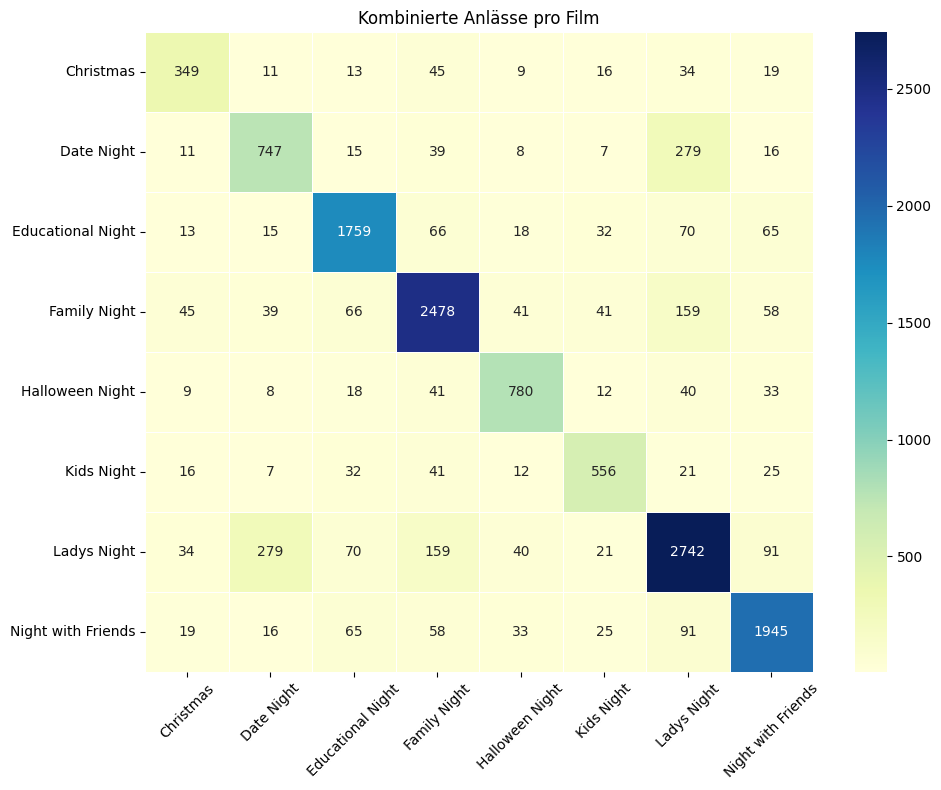

In [125]:
# Sicherstellen, dass alle Einträge Listen sind (auch Einzelzuweisungen)
df["anlass_rule"] = df["anlass_rule"].apply(
    lambda x: x if isinstance(x, list) else [x] if pd.notna(x) else []
)

# Multi-Label-Binarisierung (Anlässe als Spalten)
mlb = MultiLabelBinarizer()
anlass_matrix = pd.DataFrame(
    mlb.fit_transform(df["anlass_rule"]),
    columns=mlb.classes_,
    index=df.index
)

# Co-Occurrence-Matrix berechnen: wie oft kommen zwei Anlässe zusammen in einem Film vor?
co_occurrence = anlass_matrix.T.dot(anlass_matrix)

# Heatmap zeichnen
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Kombinierte Anlässe pro Film")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
